In [1]:
%matplotlib notebook 
import numpy as np
import wget
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate

In [2]:
#Punto 1.2

In [3]:
def f(x,n):
    f=2*(-1)**(n-1)*np.sin(n*x)/n
    return f

In [4]:
L=np.pi
cicles = 5
x = np.linspace(-L,L,100)

In [5]:
n = 1
nt = 50
F = 0


<IPython.core.display.Javascript object>


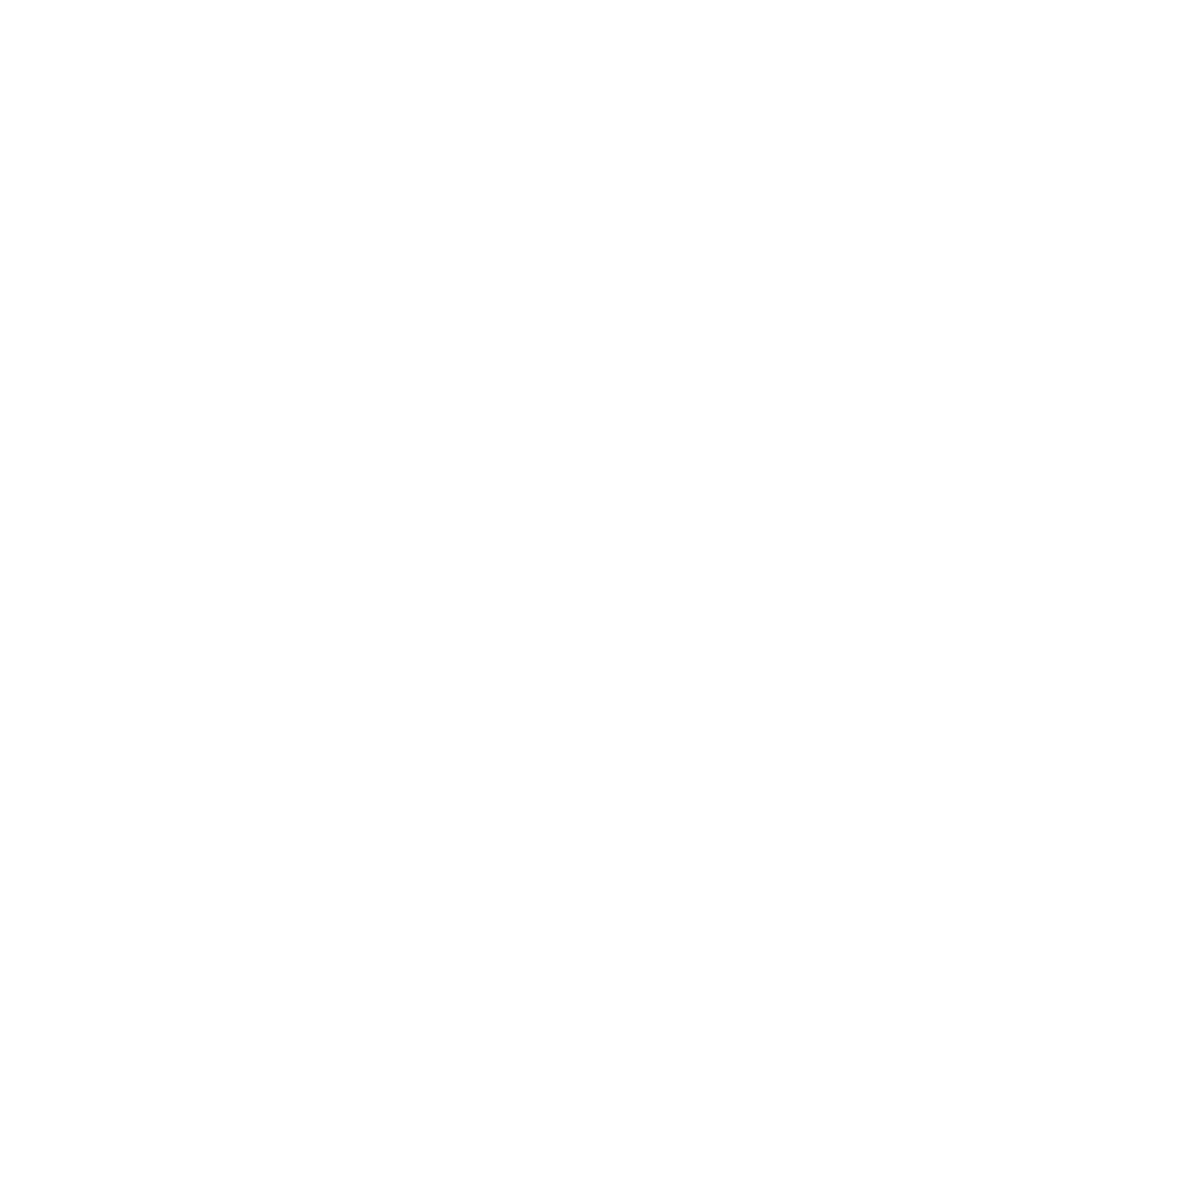

In [6]:
fig = plt.figure(figsize=(6,6))
camera = Camera(fig)

In [7]:
while n < nt:
    F += f(x,n)
    plt.plot(x,F,c='k')
    camera.snap()
    n += 1 

In [8]:
camera.animate()

In [9]:
#Punto 1.3

In [14]:
def f(t): 
    return (t**3 - t*(np.pi)**2)/12

In [15]:
def GetFourier(t,T,N):
    
    a0, error0 = integrate.quad( lambda t: f(t), -0.5*T , 0.5*T )
    a0 *= 2./T
    
    y = a0
    
    for n in range(1,N):
        bn, errorbn = integrate.quad( lambda t: f(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T , 0.5*T )
        y +=  (2.*bn/T)**2
        
    return y

In [16]:
t = np.arange(-10,10,0.001)
y = GetFourier(t,2*np.pi,60)
Riemman = (np.pi)**6/945
print(y , Riemman)

1.0173430617163515 1.017343061984449


In [ ]:
#Punto 1.4




In [19]:
def f3(t):
    return np.exp(-0.1*t)*np.sin(t)
def DExacta(t):
    return -0.1*np.exp(-0.1*t)*np.sin(t)+np.exp(-0.1*t)*np.cos(t)



<IPython.core.display.Javascript object>


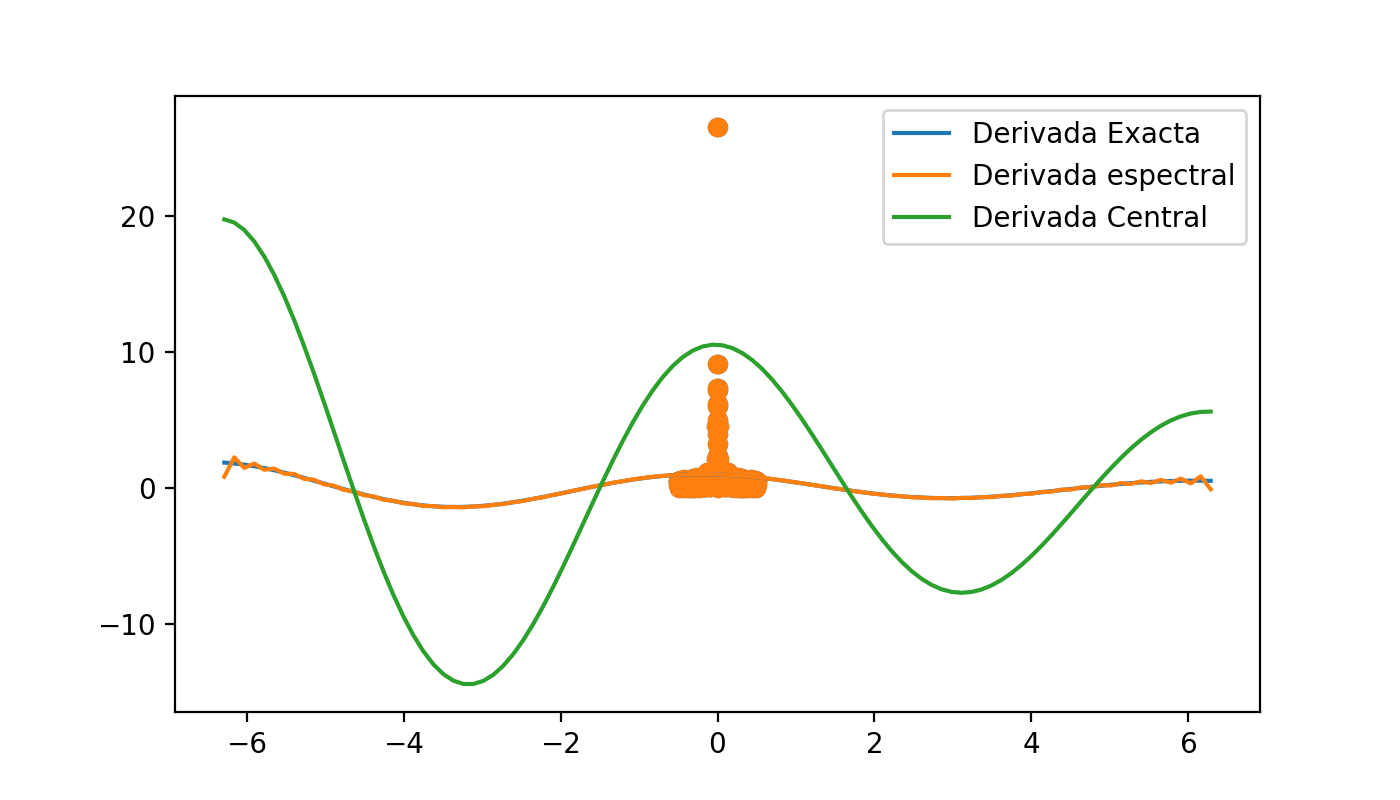

In [20]:
N=100
L=4*np.pi
DeltaX=N/L
omega0=2*np.pi/L
tcentral=np.linspace(-2*np.pi,2*np.pi,100)
texacta=np.linspace(-2*np.pi,2*np.pi,100)
Dcentral=(f3(tcentral+DeltaX)-f3(tcentral-DeltaX))/2*DeltaX
Dexacta=DExacta(texacta)

Transformada= np.fft.fft(f3(texacta))
Frecuencias=2*(np.pi/L)*np.arange(-N/2,N/2)
FrecuenciasN=np.fft.fftshift(Frecuencias)
TransDeriv=FrecuenciasN*1j*Transformada
TransInver=np.fft.ifft(TransDeriv)

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
ax.plot(texacta, Dexacta, label="Derivada Exacta")
ax.plot(texacta, TransInver.real, label="Derivada espectral")
ax.plot(tcentral, Dcentral, label="Derivada Central")
ax.legend()



In [21]:
#Punto 1.5

In [30]:
file='Downloads/ManchasSolares.dat'
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat"
Path_ =wget.download(url, file)


In [32]:
download=np.loadtxt(Path_)

In [79]:
#Punto a
anio=download[:,0]


a=0
for i in range(len(anio)):
    if anio[i] == 1900:
        a=i
        break

anio=download[a:,0]+download[a:,1]/12

print(manchas)
print(anio)
#Punto b

media=np.mean(download[a:,3])
manchas=download[a:,3]-media

[10.  12.6  7.3 ... 13.9 11.7  7.6]
[1900.08333333 1900.16666667 1900.25       ... 1995.83333333 1995.91666667
 1996.        ]


In [80]:
#Punto c
N=len(manchas)
fft=np.fft.fft(manchas)
frecuencias=np.fft.fftfreq(N,1)
ffta=np.abs(fft)

print(freq)
print(fft)

[-51.47743056 -48.87743056 -54.17743056 ... -47.57743056 -49.77743056
 -53.87743056]
[-1.87583282e-12   +0.j         -4.79240806e+03+9383.28421042j
  2.13511573e+03+4045.46771301j ... -3.20633206e+03-6344.251506j
  2.13511573e+03-4045.46771301j -4.79240806e+03-9383.28421042j]


In [83]:
mask=frecuencias <0
FFT=fft.copy()
FFT[mask]=0.
FFTA=np.abs(FFT)
#Punto d
a=np.argmax(FFTA)
f0=frecuencias[a]
T=(1/f0)/12
print(T)

10.666666666666666


In [84]:
a_A=np.abs(frecuencias) > f0
a_B=np.abs(frecuencias) < f0
fft[a_A | a_B]=0
ffta=np.abs(fft)

In [88]:
manchas_fft=np.fft.ifft(fft)

<IPython.core.display.Javascript object>


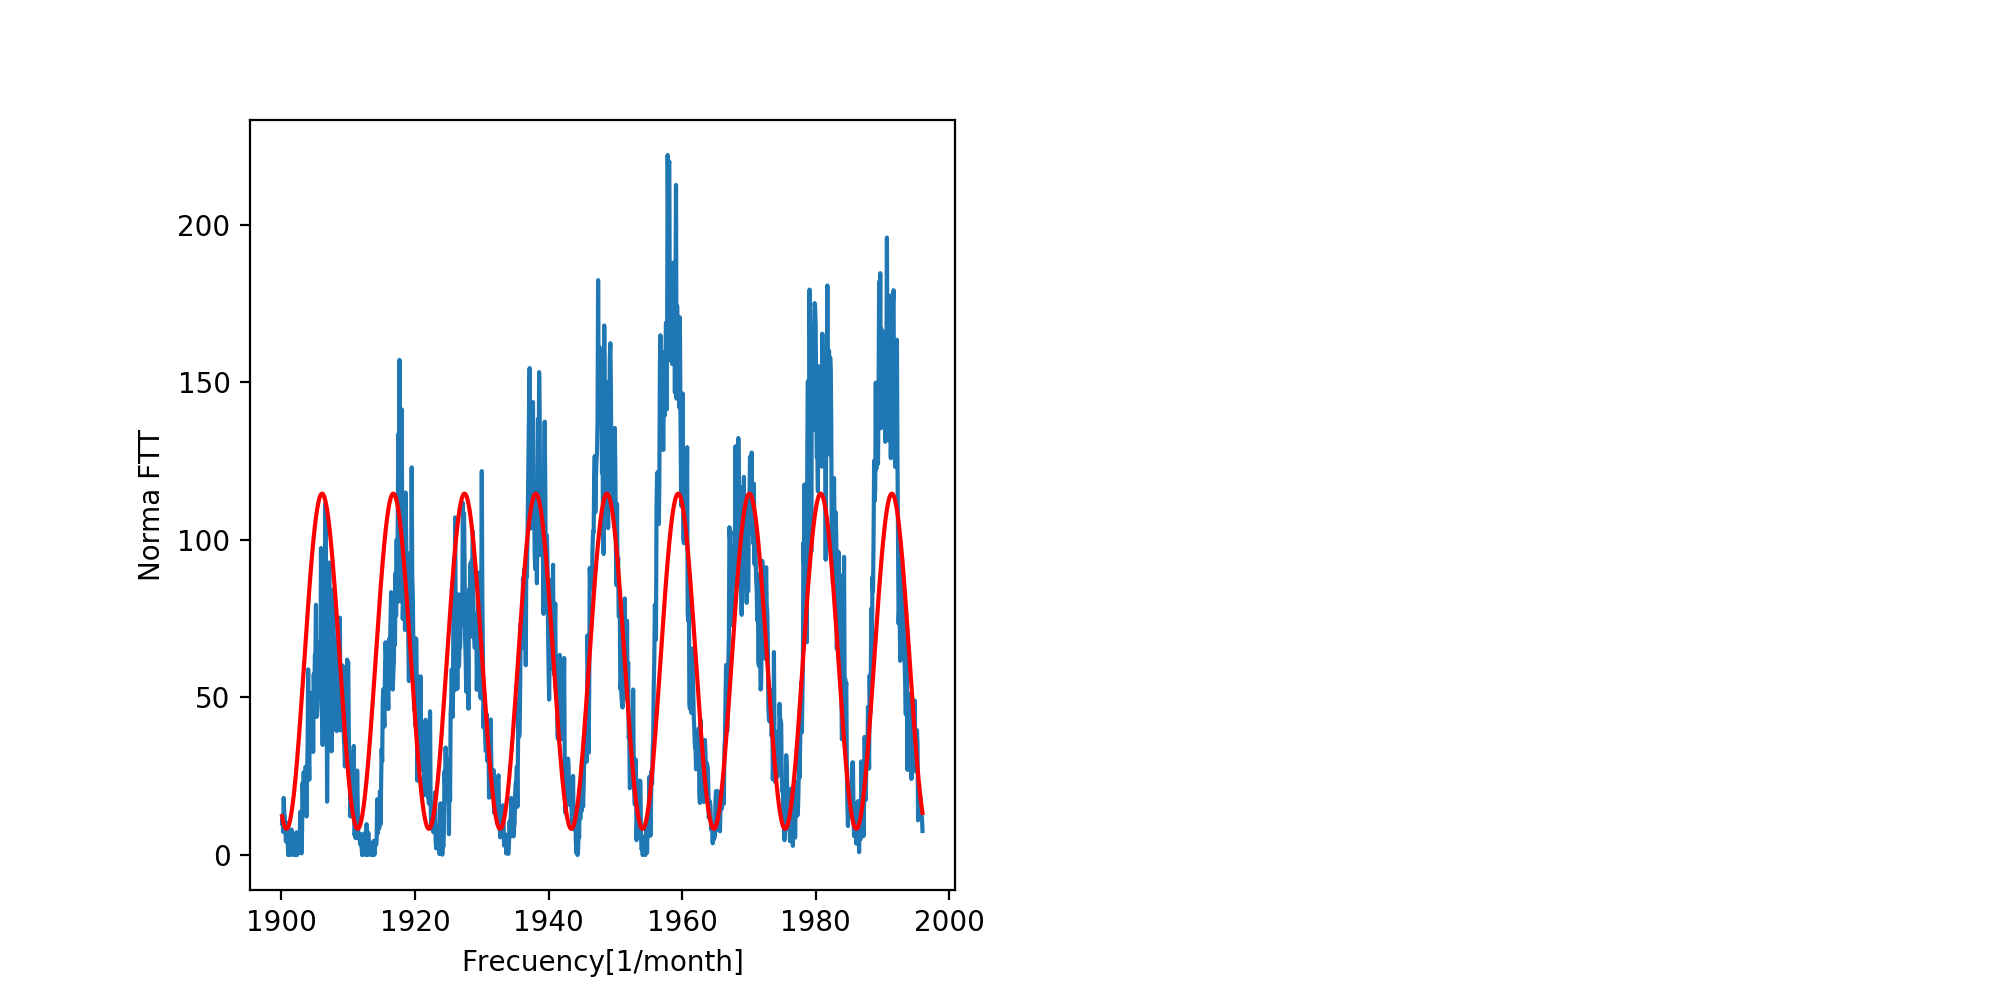

In [89]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel(r'Frecuency[1/month]')
plt.ylabel(r'Norma FTT')
plt.plot(anio, manchas+media, label=r'Manchas Solares')
plt.plot(anio, np.real(manchas_fft)+media, c='r', label='Frecuencia dominante')